In [ ]:
#Esta línea de código instala el paquete ucimlrepo (UCI Machine Learning Repository), que es una colección de bases de datos y generadores de datos, que están a dispoción de la comunidad.
!pip install ucimlrepo

#Esta línea de código, importa desde el paquete instalado previamente, "fetch_ucirep" que es la función que nos permite descargar las bases de datos de UCI.
from ucimlrepo import fetch_ucirepo

#Al importar las librerias, se recomienda nombrarlas con un nombre mas corto para llamarlas a lo largo del código.

#Importamos la librería de pandas y la importamos como "pd".
import pandas as pd

#Importamos el módulo pyplot de la libreria matplotlib y lo nombramos plt
import matplotlib.pyplot as plt

#Importamos la libreria numpy como np.
import numpy as np

#Importamos la libreria tensorflow como tf.
import tensorflow as tf

#Importamos desde el módulo "model_selection" de la libreria sklearn, importamos la función train_test_split.
from sklearn.model_selection import train_test_split

#Importamos desde el módulo preprocessing, de la libreria sklearn la función StandardScaler.
from sklearn.preprocessing import StandardScaler

In [ ]:
#Llamamos a la función "fetch_ucirepo", y solictamos que importe el dataset que corresponde a el ID "357" y le llamamos "occupancy_detection"
occupancy_detection = fetch_ucirepo(id=357)

#Una vez habiendo importado el dataset, lo convertimos en un dataframe de panda y lo nombramos data.
data = occupancy_detection.data.original

In [ ]:
#En esta celda de código, realizaremos las modificaciones necesarias para poder trabajar el dataset.

#Utilizamos la función drop, para eliminar de la base de datos las columnas de "date" y "ID" y guardamos el dataset actualizado en "df"
df = data.drop(['date', 'id'], axis=1)

#Llamamos a todas las columnas de df, y convertimos sus valores a numericos, en caso de que exista algun error el argumento "errors = 'coerce'" indica que se pondra un NA.
df[df.columns] = df[df.columns].apply(pd.to_numeric, errors='coerce')

#Aplicamos la función dropna a "df" esta función, elimina todas las filas que contengan algun NA, es decir valores en blanco.
df = df.dropna()

In [ ]:
#Imprimimos DF
df

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.180,27.2720,426.00,721.25,0.004793,1.0
1,23.150,27.2675,429.50,714.00,0.004783,1.0
2,23.150,27.2450,426.00,713.50,0.004779,1.0
3,23.150,27.2000,426.00,708.25,0.004772,1.0
4,23.100,27.2000,426.00,704.50,0.004757,1.0
...,...,...,...,...,...,...
20557,20.815,27.7175,429.75,1505.25,0.004213,1.0
20558,20.865,27.7450,423.50,1514.50,0.004230,1.0
20559,20.890,27.7450,423.50,1521.50,0.004237,1.0
20560,20.890,28.0225,418.75,1632.00,0.004279,1.0


In [ ]:
#Utilizamos describe que nos otorga la estadística basica para cada una de las varibales de df
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000
mean,20.906212,27.655925,130.756622,690.553276,0.004228,0.231031
std,1.055315,4.982154,210.430875,311.201281,0.000768,0.421503
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,20.200000,24.500000,0.000000,460.000000,0.003719,0.000000
50%,20.700000,27.290000,0.000000,565.416667,0.004292,0.000000
75%,21.525000,31.290000,301.000000,804.666667,0.004832,0.000000
max,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000


In [ ]:
#Establecemos una semilla de aleatoriedad con tensorflow, esta semilla nos permitira replicar los resultados en nuevas sesiones.
tf.random.set_seed(4500)

In [ ]:
#Creamos la variable x, la cual contiene todas las varibles del dataset excepto el target, en este caso, occupancy.
X = df.drop(["Occupancy"], axis=1)

#Guardamos la variable target, en Y
y = df['Occupancy']

In [ ]:
#Utilizamos train_test_split
#Basicamente esta herramienta nos permite dividir dividir la información del dataset en dos de manera que se utilice una parte para realizar el entrenamiento y otra para la validación.
#Los primeros dos argumentos que enviamos, son las variables ya divididas X y Y.
#Después enviamos el tamaño de la validación, en este caso el 20
#Después, agregamos una semilla para poder replicar resultados en un futuro.
#Agregamos el argumento "shuffle=true" lo que le indica a el modelo que seleccione datos al azar al realizar la separación.
#"train_test_split" crea 4 conjunto de datos, X_train, X_test, y_train, y_test.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
#StandarScaler, viene de sklearn.preprocessing, esta función estandariza la información al retirar la media y escalar las variables a un desviación unitaria,
#utilizando la siguiente función z = (x - u) / s, donde x es la información, u es la media y s es la desviación estándar.

#Definimos StandardScaler como scaler
scaler = StandardScaler()

#Escalamos X train y X test.
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Se importa expit desde scipy.special
#expit, tambien conocido como logistic sigmoid
from scipy.special import expit


#Definimos el modelo como NeuroModel
class NeuronModel():

#Inicializamos el modelo, x son los valores de entrada, y la variable target, learning_rate es el tamaño del paso que se usara en el gradiente descendiente, y error_threshold es el error aceptado.
    def __init__(self, X, y, learning_rate=0.01, error_threshold=0.001) -> None:

        #Utilizamos asserts para asegurarnos que el tamaño de x, y y learning_rate
        #assert es una función de python que nos permite asegurarnos de que una condición sea verdadera en determinado punto del codigo.
        assert X.size != 0, "X cannot be empty"
        assert y.size != 0, "y cannot be empty"
        assert learning_rate > 0, "learning rate must be positive"

        #Nos aseguramos de que X sea un arreglo de numpy, en caso de que no, usamos la función "to.numpy" para convertirlo.
        if not isinstance(X, np.ndarray):
            X = X.to_numpy()

        #Nos aseguramos de que Y sea un arreglo de numpy, en caso de que no, usamos la función "to.numpy" para convertirlo.
        if not isinstance(y, np.ndarray):
            y = y.to_numpy().reshape(-1,1)

        #Declaramos los valores con los que trabajara el modelo.
        self.X = X
        self.y = y
        self.learning_rate = learning_rate

        #Creamos los pesos
        self.w = np.zeros((X.shape[1], 1))

        #Creamos el sesgo
        self.b = np.zeros((1, 1))

        #Creamos N, que es el numero total de datos
        self.N = X.shape[0]

        #Creamos un indice para los datos
        self.J_iter = list()

        self.stopping_tolerance = error_threshold



    #Definimos un segundo modelo "compute_logistic" que obtiene w, b y X
    #Y se le aplica expit (funcion sigmoidal) a la cual entra x por los pesos + el sesgo.
    def compute_logistic(self, w, b, X):
        return expit(X@w + b)

    #Creamos el modelo "compute_cost" que calcula la función de costo.
    def compute_cost(self, y_hat, y, N):
        L = y*np.log(y_hat) + (1-y)*np.log(1-y_hat)
        J = -L.sum() / N
        return J

    #Creamos una función llamada "forward_propagation" que utiliza el modelo "compute_logistic" para hacer la propagación hacia adelane de X
    #Y lo regresa como "a"
    def forward_propagation(self, w, b, X):
        a = self.compute_logistic(w, b, X)
        return a

    #Calculamos el back_propagation que nos entrega los gradientes w y b.
    def backward_propagation(self, y_hat, y, w, X):
        N = X.shape[0]
        gradient_w = np.multiply(y_hat - y, X).sum(axis=0)/ N
        gradient_w = gradient_w.reshape(w.shape)
        gradient_b = (y_hat - y).sum() / N
        gradient_b = gradient_b.reshape(-1,1)
        return gradient_w, gradient_b


    #Creamos un modelo que actualiza los parametros w y b, utilizando los gradientes.
    def update_parameters(self, param, gradient):
        return np.subtract(param, np.multiply(self.learning_rate, gradient))


    #Se crea la función que entrenara el modelo
    def train(self, verbose=0):


        #Se inicializa y_hat usando forward_propagation
        y_hat = self.forward_propagation(self.w, self.b, self.X)

        #Se inicializa la funcion de costo
        J_prev = self.compute_cost(y_hat, self.y, self.N)


        J, current_percentage_error = 0, 100
        w, b = self.w, self.b


        #Se crea un bucle que define que mientas que el error actual sea mayor a el error defindo se debe de seguir iterando.
        while current_percentage_error > self.stopping_tolerance:
            J_prev = J

            y_hat = self.forward_propagation(w, b, self.X)

            gradient_w, gradient_b = self.backward_propagation(y_hat,
                                                               self.y,
                                                               w,
                                                               self.X)

            w = self.update_parameters(w, gradient_w)
            b = self.update_parameters(b, gradient_b)

            y_hat = self.forward_propagation(w, b, self.X)
            J = self.compute_cost(y_hat, self.y, self.N)
            self.J_iter.append(J)


            #Se calucla error de cada iteración.
            current_percentage_error = np.abs((J - J_prev)/J)*100

            if verbose:
                print(f"J_previous: {J_prev:8.6f} \t"
                      f"J_current: {J:8.6f} \t"
                      f"Error: {current_percentage_error:8.6f}")

        self.w = w
        self.b = b

    #Creamos la función de forward_propagation
    def predict(self, X):
        a = self.forward_propagation(self.w, self.b, X)
        return a


    #Creamos la función que grafica la función de costo
    def plot_cost_function(self):
        plt.plot(self.J_iter)
        plt.xlabel('Iteration')
        plt.ylabel(r"$J_{\mathbf{w}}$")

    def evaluate(self, y_hat, y):

        if not isinstance(y, np.ndarray):
            y = y.to_numpy().reshape(-1,1)

        y_hat[y_hat >= 0.5] = 1
        y_hat[y_hat < 0.5] = 0

        err = np.where((np.abs(y - y_hat) > 0) == True)[0]

        return 1-err.shape[0]/y.shape[0]

    def get_parameters(self):
        return np.vstack((self.w, self.b))

In [ ]:
#Ahora si, entrenamos el modelo, enviando los parametos necesarios e inicializando la función train.
model = NeuronModel(X=X_train, y=y_train, learning_rate=1, error_threshold=0.01)
model.train(verbose=1)

J_previous: 0.000000 	J_current: 0.434288 	Error: 100.000000
J_previous: 0.434288 	J_current: 0.337854 	Error: 28.542931
J_previous: 0.337854 	J_current: 0.284542 	Error: 18.736343
J_previous: 0.284542 	J_current: 0.249663 	Error: 13.970439
J_previous: 0.249663 	J_current: 0.224651 	Error: 11.133710
J_previous: 0.224651 	J_current: 0.205647 	Error: 9.240989
J_previous: 0.205647 	J_current: 0.190621 	Error: 7.882361
J_previous: 0.190621 	J_current: 0.178390 	Error: 6.856745
J_previous: 0.178390 	J_current: 0.168207 	Error: 6.053642
J_previous: 0.168207 	J_current: 0.159579 	Error: 5.407044
J_previous: 0.159579 	J_current: 0.152161 	Error: 4.874943
J_previous: 0.152161 	J_current: 0.145707 	Error: 4.429250
J_previous: 0.145707 	J_current: 0.140035 	Error: 4.050434
J_previous: 0.140035 	J_current: 0.135007 	Error: 3.724473
J_previous: 0.135007 	J_current: 0.130516 	Error: 3.441032
J_previous: 0.130516 	J_current: 0.126478 	Error: 3.192321
J_previous: 0.126478 	J_current: 0.122827 	Error: 

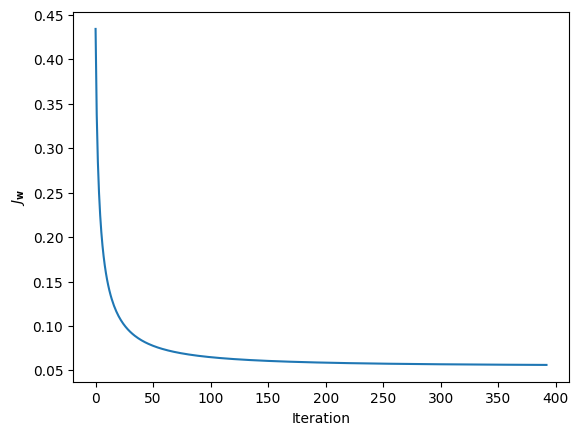

In [ ]:
#Utilizamos la función de plot_cost_functión para graficar el comportamiento de la función de costo.
model.plot_cost_function()

In [ ]:
#Guradamos lo obtenido de la función predict al evaluarse con las x de test, y lo guardamos como y_predictions
y_predictions = model.predict(X=X_test)

In [ ]:
#Creamos los parametros
model.get_parameters()

array([[-0.72815137],
       [ 0.20614421],
       [ 4.29723527],
       [ 0.95814606],
       [ 0.17301175],
       [-3.70904074]])

In [ ]:
#Evaluamos el modelo
model.evaluate(y_hat=y_predictions, y=y_test)

0.9892996108949417

#Discuciones

Al evaluar el modelo, podemos deducir, que al momento de que se realice un predicción, hay un 98.92% de probabilidad de que se acierté.

Y al observar las graficas, podemos observar que no existé ni overfitting ni underfitting.

Referencias:

UCI Machine Learning Repository. (n.d.). https://archive.ics.uci.edu/about

StandardScaler. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

Losapuntesde. (2024, February 4). Uso de assert y pruebas unitarias en Python: Asegura la calidad de tu código. Apuntes De Programador. https://apuntes.de/python/uso-de-assert-y-pruebas-unitarias-en-python-asegura-la-calidad-de-tu-codigo/#gsc.tab=0

https://blog.hubspot.es/website/clases-python#:~:text=En%20Python%2C%20%C2%ABself%C2%BB%20es,cuando%20se%20llama%20al%20m%C3%A9todo.



